In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os

# data files
covid_file = "covid_deaths2.csv"

# Read the data 
covid_data = pd.read_csv(covid_file)

# Display the data table for preview
covid_data.head()

,Date,Total_Deaths
0,2/3/2020,0.0
1,2/4/2020,0.0
2,2/5/2020,0.0
3,2/6/2020,0.0
4,2/7/2020,0.0


In [2]:
nasdaq_file = "IXIC.csv"
nasdaq_data = pd.read_csv(nasdaq_file)
nasdaq_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/3/2020,9190.719727,9299.849609,9188.549805,9273.400391,9273.400391,2420510000
1,2/4/2020,9398.389648,9485.379883,9374.049805,9467.969727,9467.969727,2445420000
2,2/5/2020,9574.099609,9574.940430,9454.929688,9508.679688,9508.679688,2462470000
3,2/6/2020,9540.980469,9575.660156,9505.679688,9572.150391,9572.150391,2267300000
4,2/7/2020,9526.639648,9570.089844,9496.530273,9520.509766,9520.509766,2238670000


In [3]:
del nasdaq_data['Open']
del nasdaq_data['High']
del nasdaq_data['Low']
del nasdaq_data['Adj Close']

In [4]:
nasdaq_data.head()

,Date,Close,Volume
0,2/3/2020,9273.400391,2420510000
1,2/4/2020,9467.969727,2445420000
2,2/5/2020,9508.679688,2462470000
3,2/6/2020,9572.150391,2267300000
4,2/7/2020,9520.509766,2238670000


In [5]:
dow_file = "DJIA.csv"
dow_data = pd.read_csv(dow_file)
dow_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/3/2020,28319.65,28630.39,28319.65,28399.81,28399.81,307910000
1,2/4/2020,28696.74,28904.88,28696.74,28807.63,28807.63,332750000
2,2/5/2020,29048.73,29308.89,29000.85,29290.85,29290.85,357540000
3,2/6/2020,29388.58,29408.05,29246.93,29379.77,29379.77,263700000
4,2/7/2020,29286.92,29286.92,29056.98,29102.51,29102.51,252860000


In [6]:
del dow_data['Open']
del dow_data['High']
del dow_data['Low']
del dow_data['Adj Close']

In [7]:
dow_data.head()

,Date,Close,Volume
0,2/3/2020,28399.81,307910000
1,2/4/2020,28807.63,332750000
2,2/5/2020,29290.85,357540000
3,2/6/2020,29379.77,263700000
4,2/7/2020,29102.51,252860000


In [8]:
sp500_file = "SP500.csv"
sp500_data = pd.read_csv(sp500_file)
sp500_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/3/2020,3235.66,3268.44,3235.66,3248.92,3248.92,3757910000
1,2/4/2020,3280.61,3306.92,3280.61,3297.59,3297.59,3995320000
2,2/5/2020,3324.91,3337.58,3313.75,3334.69,3334.69,4117730000
3,2/6/2020,3344.92,3347.96,3334.39,3345.78,3345.78,3868370000
4,2/7/2020,3335.54,3341.42,3322.12,3327.71,3327.71,3730650000


In [9]:
del sp500_data['Open']
del sp500_data['High']
del sp500_data['Low']
del sp500_data['Adj Close']

In [10]:
sp500_data.head()

,Date,Close,Volume
0,2/3/2020,3248.92,3757910000
1,2/4/2020,3297.59,3995320000
2,2/5/2020,3334.69,4117730000
3,2/6/2020,3345.78,3868370000
4,2/7/2020,3327.71,3730650000


In [11]:
sp500_data.rename(columns={'Close': 'SP500_Close', 'Volume': 'SP500_Vol'}, inplace=True)
dow_data.rename(columns={'Close': 'DOW_Close', 'Volume': 'DOW_Vol'}, inplace=True)
nasdaq_data.rename(columns={'Close': 'NASDAQ_Close', 'Volume': 'NASDAQ_Vol'}, inplace=True)

In [12]:
sp500_data.head()

,Date,SP500_Close,SP500_Vol
0,2/3/2020,3248.92,3757910000
1,2/4/2020,3297.59,3995320000
2,2/5/2020,3334.69,4117730000
3,2/6/2020,3345.78,3868370000
4,2/7/2020,3327.71,3730650000


In [13]:
dow_data.head()

,Date,DOW_Close,DOW_Vol
0,2/3/2020,28399.81,307910000
1,2/4/2020,28807.63,332750000
2,2/5/2020,29290.85,357540000
3,2/6/2020,29379.77,263700000
4,2/7/2020,29102.51,252860000


In [14]:
nasdaq_data.head()

,Date,NASDAQ_Close,NASDAQ_Vol
0,2/3/2020,9273.400391,2420510000
1,2/4/2020,9467.969727,2445420000
2,2/5/2020,9508.679688,2462470000
3,2/6/2020,9572.150391,2267300000
4,2/7/2020,9520.509766,2238670000


In [15]:
covid_data.head()

,Date,Total_Deaths
0,2/3/2020,0.0
1,2/4/2020,0.0
2,2/5/2020,0.0
3,2/6/2020,0.0
4,2/7/2020,0.0


In [16]:
merged_data1_df = dow_data.merge(sp500_data, on = "Date")

In [17]:
merged_data1_df

,Date,DOW_Close,DOW_Vol,SP500_Close,SP500_Vol
0,2/3/2020,28399.81,307910000,3248.92,3757910000
1,2/4/2020,28807.63,332750000,3297.59,3995320000
2,2/5/2020,29290.85,357540000,3334.69,4117730000
3,2/6/2020,29379.77,263700000,3345.78,3868370000
4,2/7/2020,29102.51,252860000,3327.71,3730650000
...,...,...,...,...,...
265,2/22/2021,31521.69,387210000,3876.50,5870190000
266,2/23/2021,31537.35,460410000,3881.37,6280650000
267,2/24/2021,31961.86,410150000,3925.43,5942350000
268,2/25/2021,31402.01,454110000,3829.34,6513060000


In [18]:
all_stocks_df = merged_data1_df.merge(nasdaq_data, on = "Date")

In [19]:
all_stocks_df.head()

,Date,DOW_Close,DOW_Vol,SP500_Close,SP500_Vol,NASDAQ_Close,NASDAQ_Vol
0,2/3/2020,28399.81,307910000,3248.92,3757910000,9273.400391,2420510000
1,2/4/2020,28807.63,332750000,3297.59,3995320000,9467.969727,2445420000
2,2/5/2020,29290.85,357540000,3334.69,4117730000,9508.679688,2462470000
3,2/6/2020,29379.77,263700000,3345.78,3868370000,9572.150391,2267300000
4,2/7/2020,29102.51,252860000,3327.71,3730650000,9520.509766,2238670000


In [20]:
covid_stocks_df = all_stocks_df.merge(covid_data, on = "Date")

In [21]:
covid_stocks_df.head()

,Date,DOW_Close,DOW_Vol,SP500_Close,SP500_Vol,NASDAQ_Close,NASDAQ_Vol,Total_Deaths
0,2/3/2020,28399.81,307910000,3248.92,3757910000,9273.400391,2420510000,0.0
1,2/4/2020,28807.63,332750000,3297.59,3995320000,9467.969727,2445420000,0.0
2,2/5/2020,29290.85,357540000,3334.69,4117730000,9508.679688,2462470000,0.0
3,2/6/2020,29379.77,263700000,3345.78,3868370000,9572.150391,2267300000,0.0
4,2/7/2020,29102.51,252860000,3327.71,3730650000,9520.509766,2238670000,0.0


In [22]:
covid_stock_price_df = covid_stocks_df.drop(['DOW_Vol', 'SP500_Vol', 'NASDAQ_Vol'], axis=1)

In [23]:
covid_stock_price_df.head()

,Date,DOW_Close,SP500_Close,NASDAQ_Close,Total_Deaths
0,2/3/2020,28399.81,3248.92,9273.400391,0.0
1,2/4/2020,28807.63,3297.59,9467.969727,0.0
2,2/5/2020,29290.85,3334.69,9508.679688,0.0
3,2/6/2020,29379.77,3345.78,9572.150391,0.0
4,2/7/2020,29102.51,3327.71,9520.509766,0.0


In [24]:
covid_stock_price_df.to_csv("covid_stock_price.csv")

In [25]:
#x = covid_stock_price_df['Total_Deaths']
#y = covid_stock_price_df['DOW_Close']

#plt.scatter(x, y, color="lightskyblue", edgecolors="black")
#plt.xlabel("Covid_Deaths")
#plt.ylabel("DOW Closing Price")
#plt.title("Covid Deaths vs. DOW Closing Price")
#plt.savefig("covid-dow.png")
#plt.show()

#plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['Total_Deaths'], color='r')
#plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['DOW_Close'], color='b')
#plt.xlabel("Date")
#plt.ylabel("Covid_Deaths")
#plt.title("TBD")
#plt.savefig("covid-dow.png")
#plt.show()


In [26]:
#covid_stock_price_df.plot(kind="bar", facecolor="red", legend=False, width=.5)
#plt.show()
#covid_stock_price_df['Date'], covid_stock_price_df['Total_Deaths']

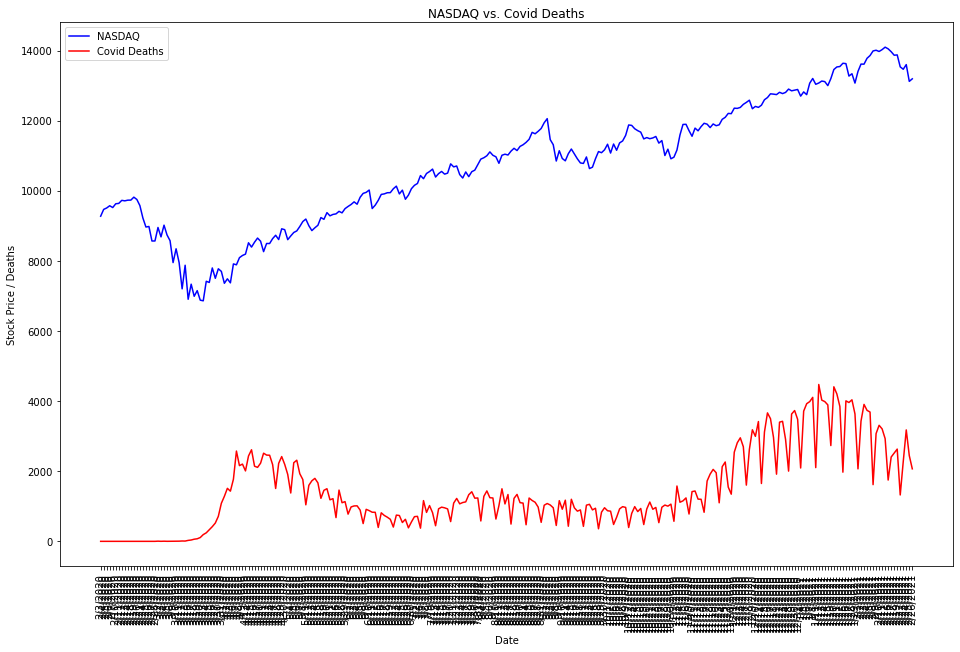

In [27]:
from matplotlib.pyplot import figure

# Plot the charts and apply some styling
figure(figsize=(16, 10))
nasdaq, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['NASDAQ_Close'], color="blue", label="NASDAQ")
deaths, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['Total_Deaths'], color="red", label="Covid Deaths")
# Add labels to X and Y axes :: Add title
plt.title("NASDAQ vs. Covid Deaths")
plt.xlabel("Date")
plt.ylabel("Stock Price / Deaths")
plt.xticks(rotation ='vertical')
plt.legend(handles=[nasdaq, deaths], loc="best")
plt.show()

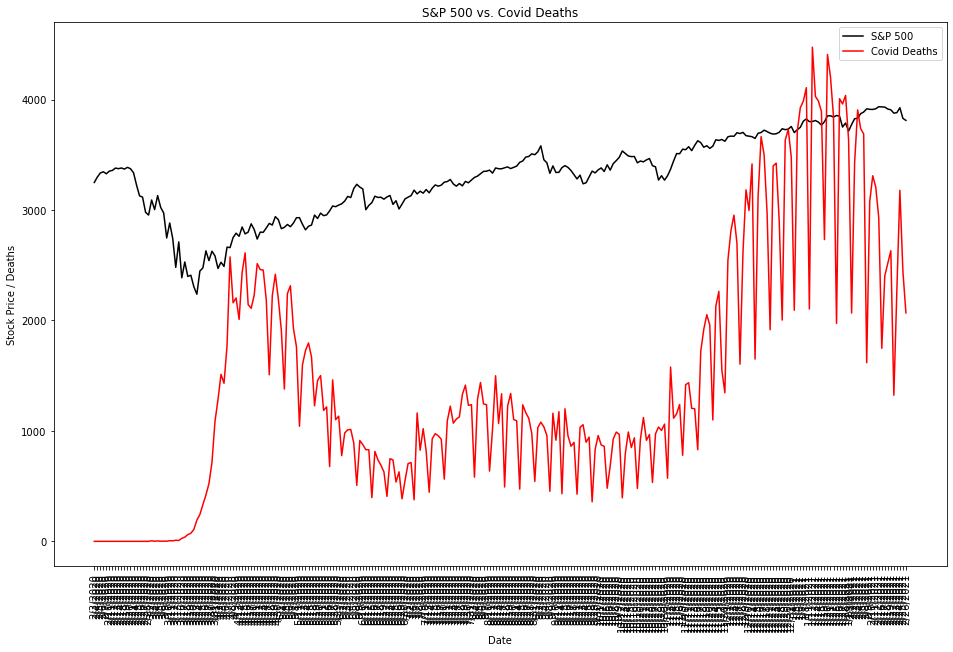

In [28]:
# Plot the charts and apply some styling
figure(figsize=(16, 10))
sp500, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['SP500_Close'], color="black", label="S&P 500")
deaths, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['Total_Deaths'], color="red", label="Covid Deaths")
# Add labels to X and Y axes :: Add title
plt.title("S&P 500 vs. Covid Deaths")
plt.xlabel("Date")
plt.ylabel("Stock Price / Deaths")
plt.xticks(rotation ='vertical')
plt.legend(handles=[sp500, deaths], loc="best")
plt.show()

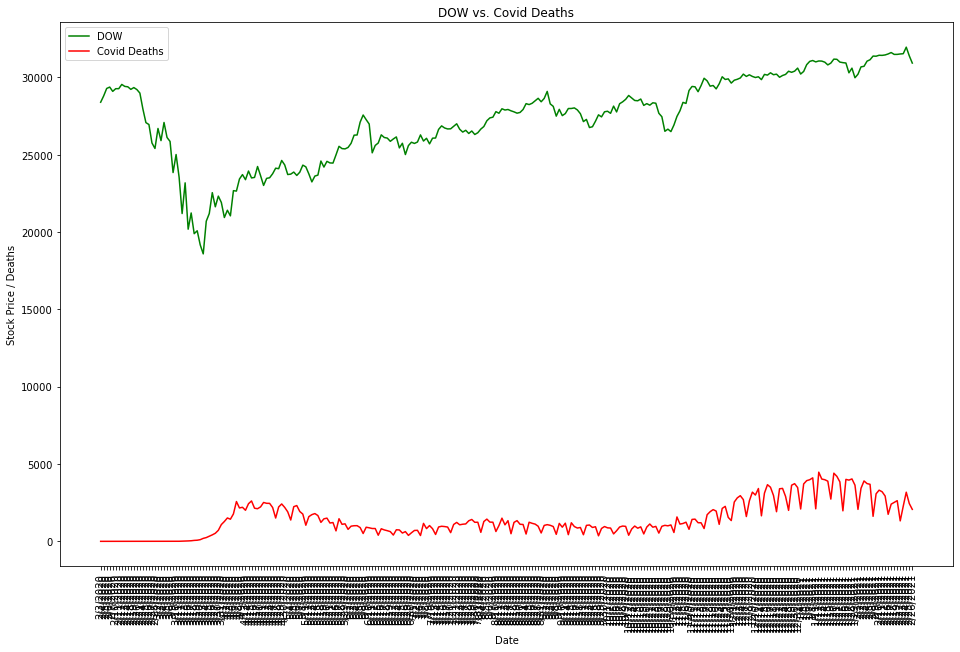

In [29]:
# Plot the charts and apply some styling
figure(figsize=(16, 10))
dow, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['DOW_Close'], color="green", label="DOW")
deaths, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['Total_Deaths'], color="red", label="Covid Deaths")
# Add labels to X and Y axes :: Add title
plt.title("DOW vs. Covid Deaths")
plt.xlabel("Date")
plt.ylabel("Stock Price / Deaths")
plt.xticks(rotation ='vertical')
plt.legend(handles=[dow, deaths], loc="best")
plt.show()

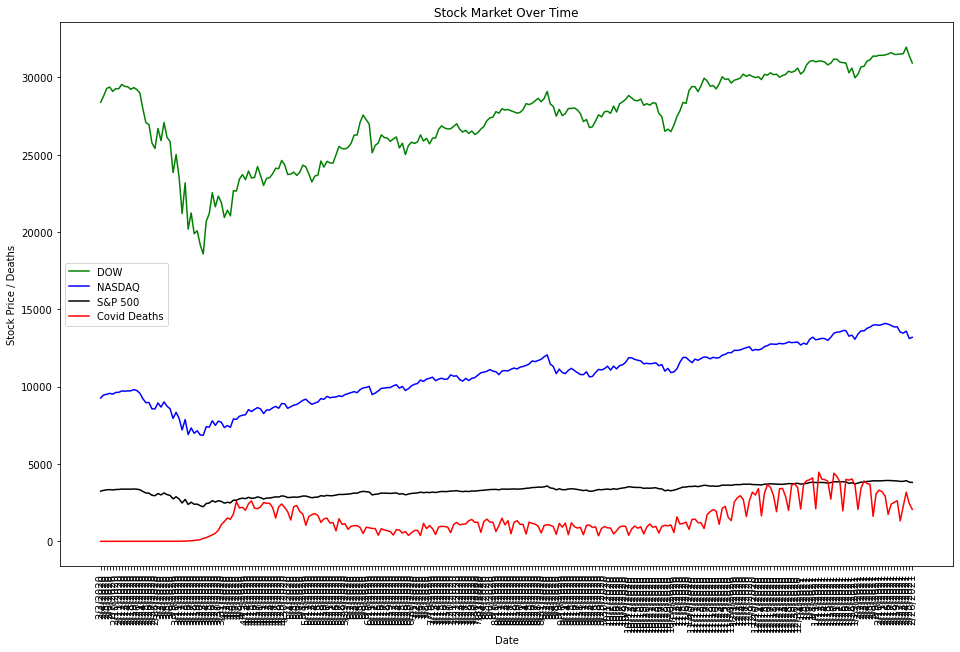

In [30]:
# Plot the charts and apply some styling
figure(figsize=(16, 10))
dow, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['DOW_Close'], color="green", label="DOW")
nasdaq, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['NASDAQ_Close'], color="blue", label="NASDAQ")
sp500, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['SP500_Close'], color="black", label="S&P 500")
deaths, = plt.plot(covid_stock_price_df['Date'], covid_stock_price_df['Total_Deaths'], color="red", label="Covid Deaths")
# Add labels to X and Y axes :: Add title
plt.title("Stock Market Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price / Deaths")
plt.xticks(rotation ='vertical')
plt.legend(handles=[dow, nasdaq, sp500, deaths], loc="best")
plt.show()